In [44]:
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_excel('Columbia_Hackathon_Data_Dogfood.xlsx')
df

,sale_id,sale_date,ad_exp,sns,product_id,product_brand,product_name,price,qty,customer_id,...,city,st,zip,lat,lng,marital,education,income,age,prime
0,1,2021-10-01,Don't recall seeing an ad,0,3,Alpha,"Alpha Natural Sensitive Systems, Skin & Coat S...",48.99,1,370,...,Boise,ID,83711,43.4599,-116.2440,Married,Some college or trade school,"$80,000 - $99,999",55-64,0
1,2,2021-10-01,Don't recall seeing an ad,1,14,Arf,Arf Soft & Tender American Jerky Dog Treats,11.52,1,625,...,Durham,NC,27710,36.0512,-78.8577,Married,High school graduate,"$100,000 or more",45-54,1
2,3,2021-10-01,Don't recall seeing an ad,0,23,Bezt,Bezt Adult Chicken and Brown Rice Recipe Dry D...,14.22,1,905,...,Phoenix,AZ,85099,33.2765,-112.1872,Married,College graduate,"$100,000 or more",45-54,1
3,4,2021-10-01,Don't recall seeing an ad,0,33,Alpha,"Alpha Probiotics Shredded Blend High Protein, ...",79.31,1,1061,...,Portsmouth,NH,214,43.0059,-71.0132,Married,Some college or trade school,"$100,000 or more",55-64,1
4,5,2021-10-01,Don't recall seeing an ad,0,26,Alpha,Alpha Natural Adult Lamb & Rice Dry Dog Food,25.16,1,1411,...,Chicago,IL,60624,41.8804,-87.7223,Single,Some college or trade school,"$40,000 - $59,999",25-34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8889,8890,2022-09-30,Sponsored Brands,0,26,Alpha,Alpha Natural Adult Lamb & Rice Dry Dog Food,25.16,2,3657,...,Bellevue,WA,98008,47.6115,-122.1162,Single,College graduate,"$40,000 - $59,999",35-44,1
8890,8891,2022-09-30,Don't recall seeing an ad,0,44,Bezt,Bezt Natural Adult Healthy Weight Chicken and ...,54.14,1,3917,...,Muncie,IN,47306,40.2023,-85.4082,Married,College graduate,"$20,000 - $39,999",25-34,1
8891,8892,2022-09-30,Sponsored Brands,0,66,Bezt,Bezt Natural Adult Beef and Brown Rice Dry Dog...,16.13,2,3944,...,Dallas,TX,75251,32.9189,-96.7751,Married,College graduate,"Less than $20,000",25-34,1
8892,8893,2022-09-30,Don't recall seeing an ad,0,62,K99,K99 Super Premium Dog Food – Professional Dry ...,73.99,1,3995,...,Hartford,CT,6140,41.7918,-72.7188,Single,College graduate,"$20,000 - $39,999",45-54,1


In [14]:
# Show all the records on the map
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs='EPSG:4326')

In [15]:
df_geo.to_file('dogfood_sale.shp') 

<ipython-input-15-be63b8342a8a>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_geo.to_file('dogfood_sale.shp')


In [46]:
df['product_brand'].value_counts()

Alpha              2803
Bezt               1522
Arf                 906
Health One          733
Choice              488
Seattle Gourmet     315
Garland             314
Beam                241
Top                 238
King                212
Paws                182
Ruby                141
Beethoven           104
Astro                85
Romero               83
Hanover              74
Flora                70
Perro                69
Rivera               61
K99                  61
Hearth               44
Omaha                40
Playtime             39
Bones                37
Kastle               32
Name: product_brand, dtype: int64

In [47]:
df_new = df['income'].astype('category')

0       $80,000 - $99,999
1        $100,000 or more
2        $100,000 or more
3        $100,000 or more
4       $40,000 - $59,999
              ...        
8889    $40,000 - $59,999
8890    $20,000 - $39,999
8891    Less than $20,000
8892    $20,000 - $39,999
8893     $100,000 or more
Name: income, Length: 8894, dtype: category
Categories (6, object): ['$100,000 or more', '$20,000 - $39,999', '$40,000 - $59,999', '$60,000 - $79,999', '$80,000 - $99,999', 'Less than $20,000']

In [48]:
df['ad_exp'].value_counts()

Don't recall seeing an ad    2928
Sponsored Brands             2435
Sponsored Products           1958
Display/banner ad            1253
Video ad                      286
Some other type of ad          34
Name: ad_exp, dtype: int64

In [ ]:
if df[]

In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_quarter'] = df['sale_date'].dt.quarter

In [29]:
df.describe()

,sale_id,sns,product_id,price,qty,customer_id,zip,lat,lng,prime,sale_quarter
count,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000
mean,4447.500000,0.246908,33.091185,39.169207,1.083539,2488.578480,53569.467619,36.758731,-92.956073,0.850911,2.451990
std,2567.620981,0.431237,27.951837,20.028286,0.289035,1434.927911,28554.303136,5.304217,15.898208,0.356196,1.000787
min,1.000000,0.000000,1.000000,4.730000,1.000000,1.000000,214.000000,21.281100,-157.879500,0.000000,1.000000
25%,2224.250000,0.000000,9.000000,19.990000,1.000000,1262.000000,30340.000000,33.016900,-102.086475,1.000000,2.000000
50%,4447.500000,0.000000,25.000000,41.120000,1.000000,2482.000000,48981.000000,37.401100,-87.942900,1.000000,3.000000
75%,6670.750000,0.000000,53.000000,56.040000,1.000000,3719.000000,79415.000000,40.668100,-80.686900,1.000000,3.000000
max,8894.000000,1.000000,100.000000,106.900000,3.000000,5000.000000,99812.000000,64.856100,-70.701400,1.000000,4.000000


In [39]:
df['price_interval'] = pd.cut(df['price'], bins = 10)

In [42]:
df['price_interval']

0       (45.598, 55.815]
1        (4.628, 14.947]
2        (4.628, 14.947]
3       (76.249, 86.466]
4       (14.947, 25.164]
              ...       
8889    (14.947, 25.164]
8890    (45.598, 55.815]
8891    (14.947, 25.164]
8892    (66.032, 76.249]
8893    (35.381, 45.598]
Name: price_interval, Length: 8894, dtype: category
Categories (10, interval[float64, right]): [(4.628, 14.947] < (14.947, 25.164] < (25.164, 35.381] < (35.381, 45.598] ... (66.032, 76.249] < (76.249, 86.466] < (86.466, 96.683] < (96.683, 106.9]]

In [40]:
df['price_interval'].value_counts()

(14.947, 25.164]    2231
(35.381, 45.598]    1851
(55.815, 66.032]    1690
(45.598, 55.815]     886
(25.164, 35.381]     881
(4.628, 14.947]      750
(66.032, 76.249]     389
(76.249, 86.466]     117
(96.683, 106.9]       69
(86.466, 96.683]      30
Name: price_interval, dtype: int64

# Data Cleaning

We analyze the top brand Alpha as an example

In [10]:
bones = df[df['product_brand']=='Bones']
bones

,sale_id,sale_date,ad_exp,sns,product_id,product_brand,product_name,price,qty,customer_id,...,st,zip,lat,lng,marital,education,income,age,prime,sale_quarter
91,92,2021-10-08,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,2731,...,TX,78245,29.4189,-98.6895,Married,College graduate,"$80,000 - $99,999",25-34,1,4
294,295,2021-10-23,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,546,...,GA,30033,33.8123,-84.2819,Married,College graduate,"$40,000 - $59,999",35-44,1,4
460,461,2021-11-02,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,4718,...,IN,46231,39.7038,-86.3029,Married,High school graduate,"$40,000 - $59,999",45-54,1,4
465,466,2021-11-03,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,722,...,TX,75265,32.7673,-96.7776,Single,High school graduate,"$40,000 - $59,999",18-24,1,4
469,470,2021-11-03,Sponsored Brands,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,1464,...,FL,32854,28.5663,-81.2608,Domestic partner/serious relationship,College graduate,"$80,000 - $99,999",35-44,1,4
629,630,2021-11-13,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,165,...,CA,93584,33.7866,-118.2987,Married,Some college or trade school,"$20,000 - $39,999",25-34,1,4
880,881,2021-11-30,Sponsored Brands,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,2363,...,VA,22212,38.8808,-77.1130,Single,Some college or trade school,"$100,000 or more",45-54,1,4
1227,1228,2021-12-19,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,394,...,TX,77343,30.7813,-95.5953,Single,Some college or trade school,"$100,000 or more",55-64,0,4
1324,1325,2021-12-23,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,2,4385,...,OH,44197,41.6857,-81.6728,Married,College graduate,"$20,000 - $39,999",25-34,1,4
1961,1962,2022-01-26,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,4512,...,MO,64160,39.2829,-94.4090,Married,Some college or trade school,"$80,000 - $99,999",35-44,1,1


Quarter 1 = 1st January to 31st March \
Quarter 2 = 1st April to 30th June \
Quarter 3 = 1st July to 30th September \
Quarter 4 = 1st October to 31st December 

In [11]:
bones['sale_date'] = pd.to_datetime(bones['sale_date'])

/var/folders/vl/2g8y29gx603c00ljzx__ssjc0000gn/T/ipykernel_33666/995618317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bones['sale_date'] = pd.to_datetime(bones['sale_date'])


In [12]:
bones['sale_quarter'] = bones['sale_date'].dt.quarter

/var/folders/vl/2g8y29gx603c00ljzx__ssjc0000gn/T/ipykernel_33666/1154144283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bones['sale_quarter'] = bones['sale_date'].dt.quarter


In [13]:
bones.drop(columns=['sale_date', 'lat', 'lng', 'zip', 'customer_id'], inplace=True)

/var/folders/vl/2g8y29gx603c00ljzx__ssjc0000gn/T/ipykernel_33666/1831638189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bones.drop(columns=['sale_date', 'lat', 'lng', 'zip', 'customer_id'], inplace=True)


In [15]:
bones

,sale_id,ad_exp,sns,product_id,product_brand,product_name,price,qty,gender,city,st,marital,education,income,age,prime,sale_quarter
91,92,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,F,San Antonio,TX,Married,College graduate,"$80,000 - $99,999",25-34,1,4
294,295,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,M,Decatur,GA,Married,College graduate,"$40,000 - $59,999",35-44,1,4
460,461,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,F,Indianapolis,IN,Married,High school graduate,"$40,000 - $59,999",45-54,1,4
465,466,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,F,Dallas,TX,Single,High school graduate,"$40,000 - $59,999",18-24,1,4
469,470,Sponsored Brands,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,F,Orlando,FL,Domestic partner/serious relationship,College graduate,"$80,000 - $99,999",35-44,1,4
629,630,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,M,Lancaster,CA,Married,Some college or trade school,"$20,000 - $39,999",25-34,1,4
880,881,Sponsored Brands,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,M,Arlington,VA,Single,Some college or trade school,"$100,000 or more",45-54,1,4
1227,1228,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,M,Huntsville,TX,Single,Some college or trade school,"$100,000 or more",55-64,0,4
1324,1325,Sponsored Products,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,2,M,Cleveland,OH,Married,College graduate,"$20,000 - $39,999",25-34,1,4
1961,1962,Don't recall seeing an ad,0,84,Bones,Bones Human Grade Dehydrated Whole Grain Dog F...,26.45,1,M,Kansas City,MO,Married,Some college or trade school,"$80,000 - $99,999",35-44,1,1


TypeError: title() missing 1 required positional argument: 'label'

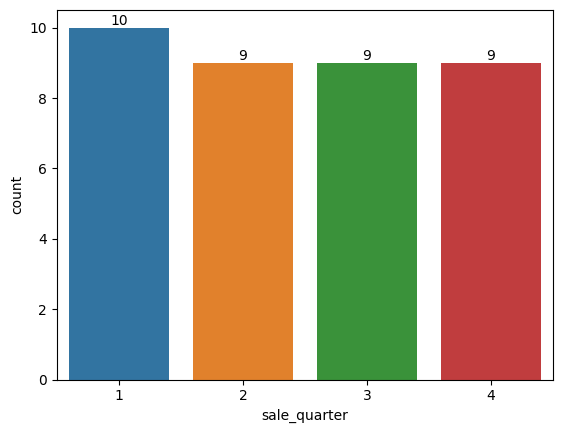

In [16]:
ax = sns.countplot(x=bones["sale_quarter"])
ax.bar_label(ax.containers[0])
plt.title()
plt.show()
# Date (quarter) do have impact on the reuslt

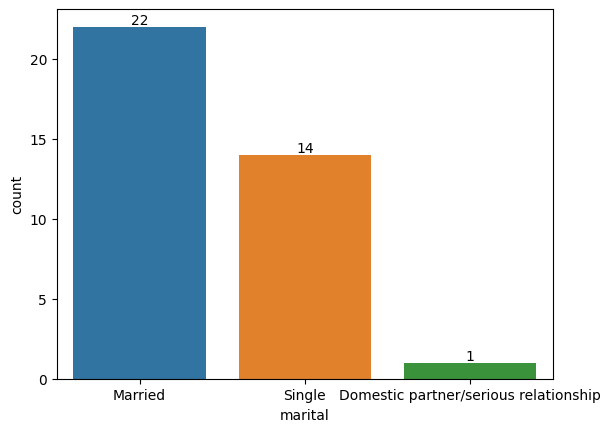

In [19]:
ax = sns.countplot(x=bones["marital"])
ax.bar_label(ax.containers[0])
plt.show()

# Gender does not affect the result

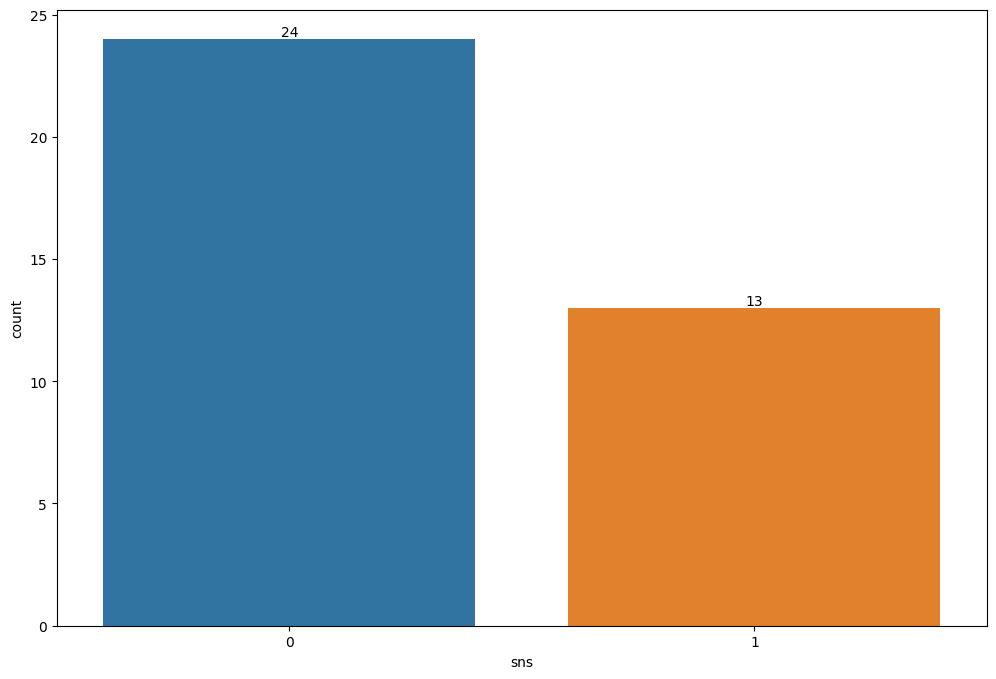

In [28]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=bones["sns"])
ax.bar_label(ax.containers[0])
plt.show()

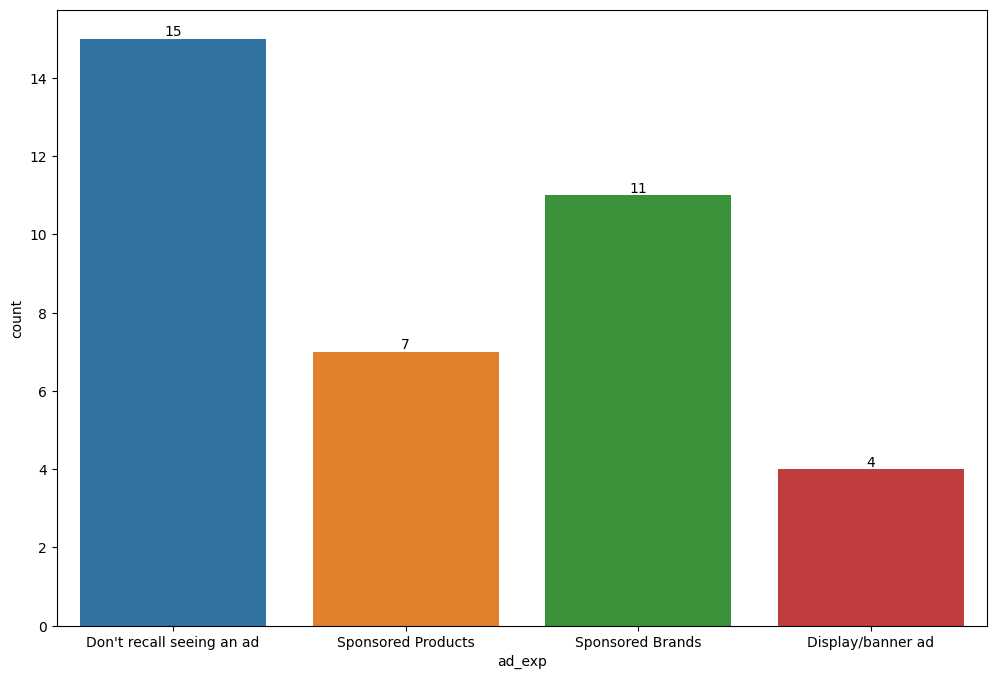

In [43]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=bones["ad_exp"])
ax.bar_label(ax.containers[0])
plt.show()

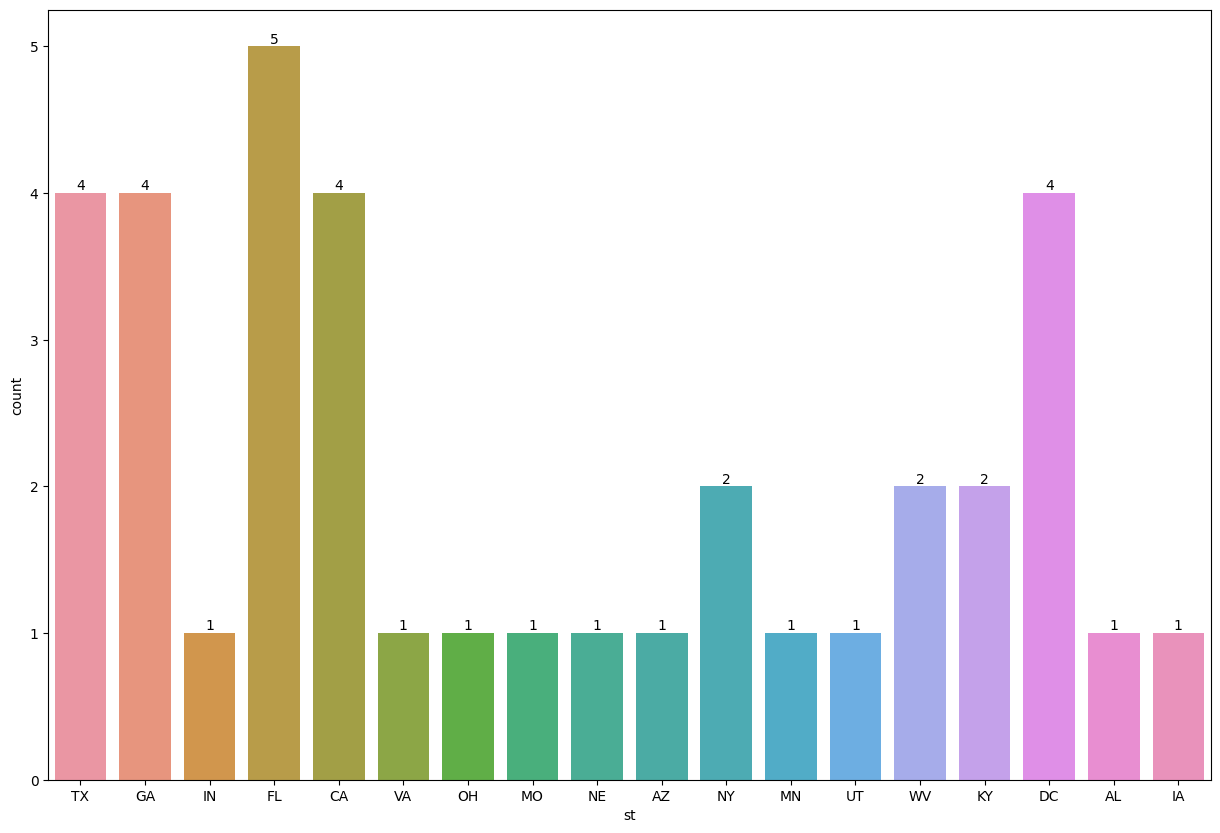

In [21]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=bones["st"])
ax.bar_label(ax.containers[0])
plt.show()

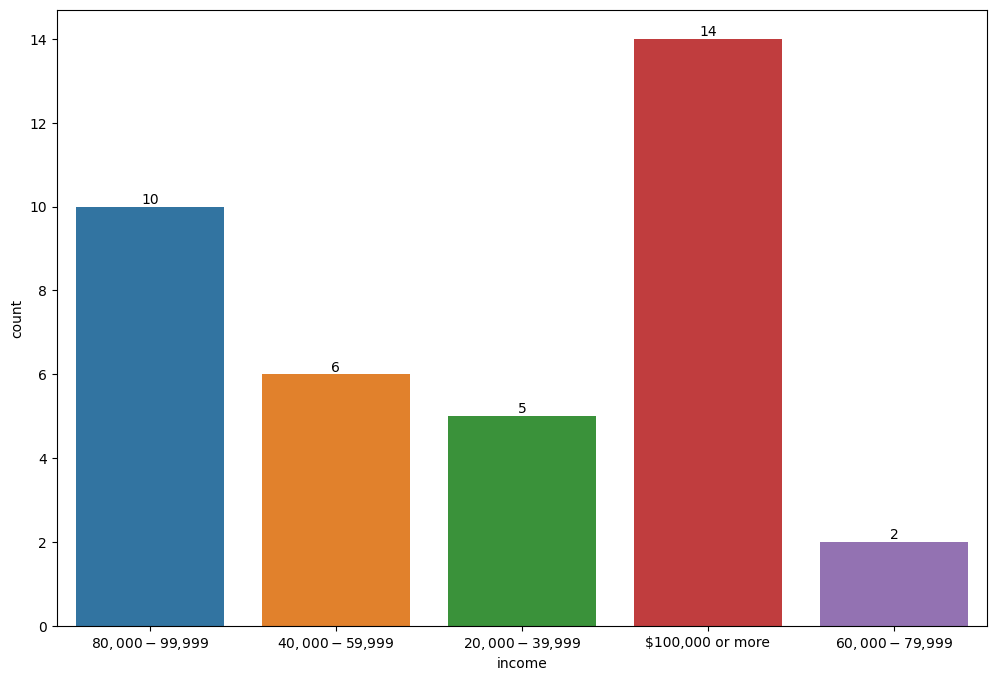

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=bones["income"])
ax.bar_label(ax.containers[0])
plt.show()

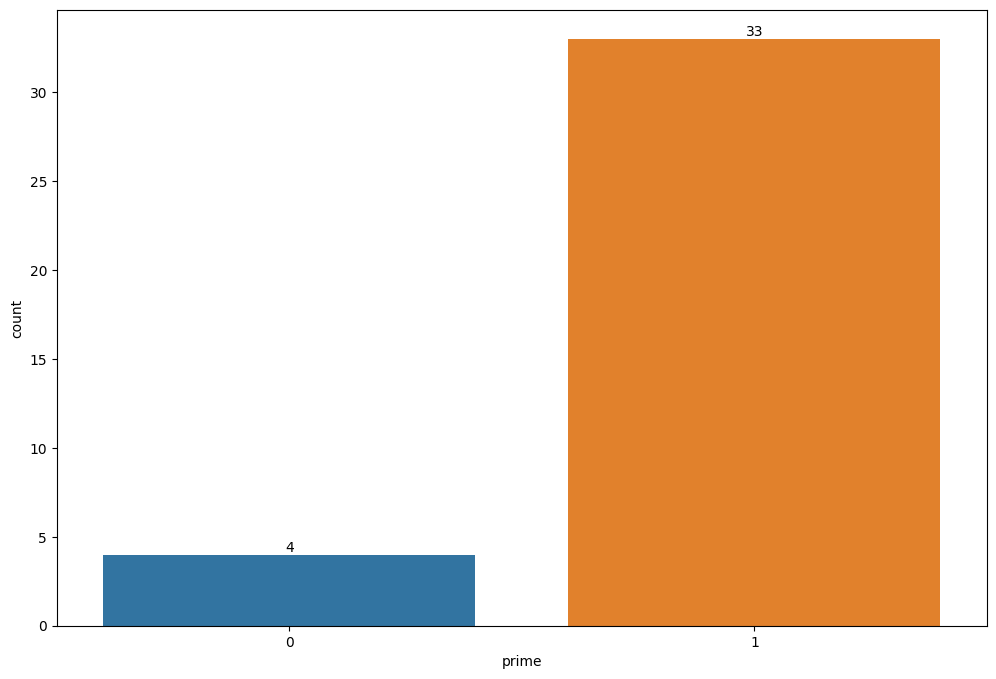

In [25]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=bones["prime"])
ax.bar_label(ax.containers[0])
plt.show()

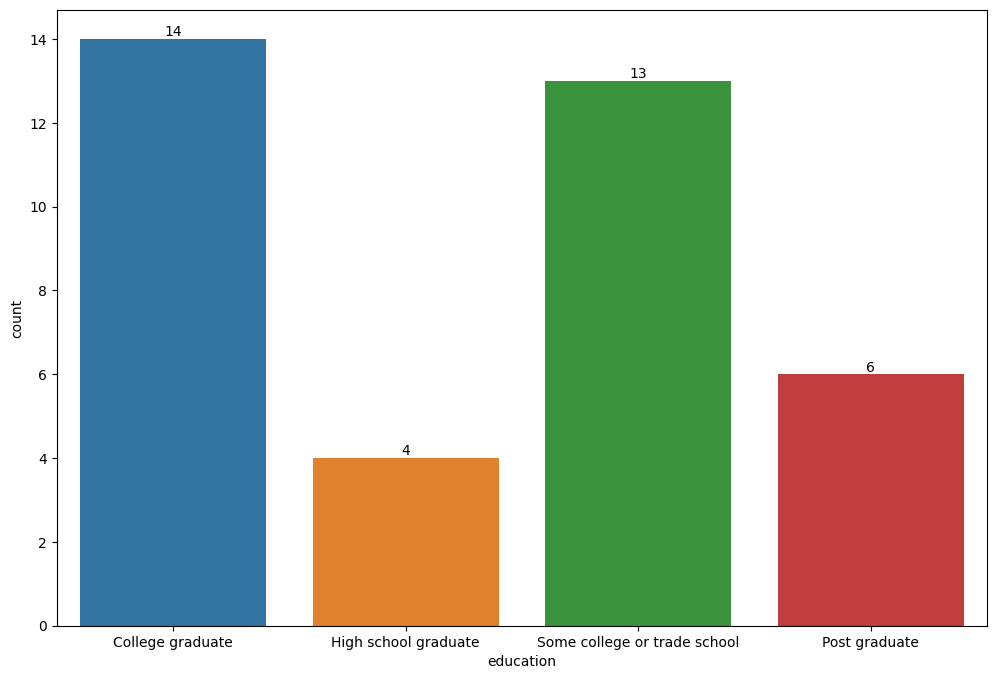

In [26]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=bones["education"])
ax.bar_label(ax.containers[0])
plt.show()

/var/folders/vl/2g8y29gx603c00ljzx__ssjc0000gn/T/ipykernel_33666/869938561.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = bones.corr()


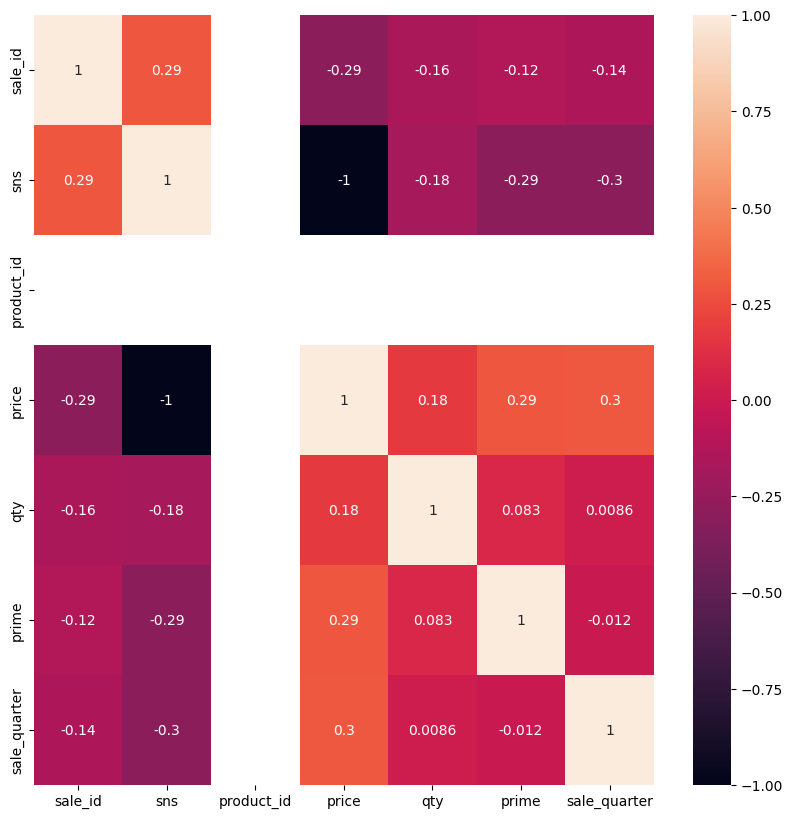

In [22]:
plt.figure(figsize=(10,10))
corrMatrix = bones.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
bezt = df[df['product_brand']=='Bezt']
bezt

,sale_id,sale_date,ad_exp,sns,product_id,product_brand,product_name,price,qty,customer_id,...,st,zip,lat,lng,marital,education,income,age,prime,sale_quarter
2,3,2021-10-01,Don't recall seeing an ad,0,23,Bezt,Bezt Adult Chicken and Brown Rice Recipe Dry D...,14.22,1,905,...,AZ,85099,33.2765,-112.1872,Married,College graduate,"$100,000 or more",45-54,1,4
10,11,2021-10-01,Sponsored Products,1,22,Bezt,"Bezt Natural Adult Wet Dog Food, 12.5-oz cans ...",31.58,1,3634,...,CA,92705,33.7540,-117.7919,Married,College graduate,"$60,000 - $79,999",65+,1,4
16,17,2021-10-02,Display/banner ad,0,51,Bezt,Bezt Natural Adult Dry Dog Food,60.42,1,499,...,GA,31132,33.7488,-84.3883,Married,Post graduate,"$100,000 or more",35-44,1,4
18,19,2021-10-02,Sponsored Brands,1,11,Bezt,Bezt Natural Adult Fish and Brown Rice Dry Dog...,60.78,1,1663,...,NV,89135,36.1378,-115.3261,Single,College graduate,"$80,000 - $99,999",55-64,0,4
34,35,2021-10-03,Sponsored Brands,0,10,Bezt,Bezt Natural Adult Healthy Weight Chicken and ...,56.99,1,4265,...,CO,80161,39.7388,-104.4083,Married,College graduate,"Less than $20,000",35-44,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,8878,2022-09-30,Don't recall seeing an ad,1,10,Bezt,Bezt Natural Adult Healthy Weight Chicken and ...,54.14,1,2175,...,MI,48550,43.0349,-83.6887,Married,Some college or trade school,"$100,000 or more",35-44,1,3
8881,8882,2022-09-30,Sponsored Brands,0,10,Bezt,Bezt Natural Adult Healthy Weight Chicken and ...,56.99,1,2668,...,DE,19886,39.5645,-75.5970,Married,Post graduate,"$100,000 or more",45-54,0,3
8886,8887,2022-09-30,Sponsored Brands,0,5,Bezt,Bezt Natural Adult Small Breed Dry Dog Food,16.13,1,3172,...,MN,55108,44.9806,-93.1771,Single,College graduate,"$60,000 - $79,999",55-64,1,3
8890,8891,2022-09-30,Don't recall seeing an ad,0,44,Bezt,Bezt Natural Adult Healthy Weight Chicken and ...,54.14,1,3917,...,IN,47306,40.2023,-85.4082,Married,College graduate,"$20,000 - $39,999",25-34,1,3


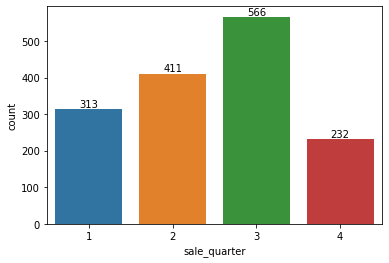

In [17]:
ax = sns.countplot(x=bezt["sale_quarter"])
ax.bar_label(ax.containers[0])
plt.show()

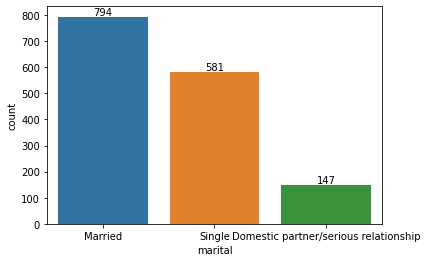

In [23]:
ax = sns.countplot(x=bezt["marital"])
ax.bar_label(ax.containers[0])
plt.show()

# Training
Split the full data into 8:2, training set vs test set.